<a href="https://colab.research.google.com/github/hyo250/gittest/blob/master/iris_k_fold_%26_best_model_%EC%B0%BE%EA%B8%B0(%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
cd /content/drive/MyDrive/인공지능실습/모두의 딥러닝/

/content/drive/MyDrive/인공지능실습/모두의 딥러닝


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# iris 머신러닝
- x: 꽃의 너비, 꽃잎높이, 꽃받침 너비, 꽃받침높이
- y: 꽃의 종류

- 인공지능= 예측 or 분류
- 회귀분석(예측)에서 결과값은 1개, 무한대 범위에서.
- 분류는 이항분류(둘중 하나) 또는 다항 분류
- 결과값이 0~1사이일때 output을 1로 하면 출력결과는 0~1 사이 되도록 시그모이드를 사용하는 것을 권장
- 시그모이드는 0~1사이로 출력. 중간값 0.5 기준으로 사용자가 직접 if 함수로 true / false 값으로 만들어야 함. 
- 

- 다항분류의 예

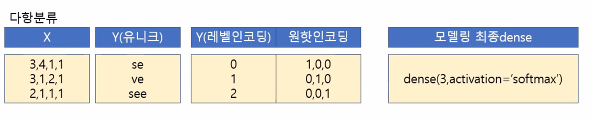

- 이항분류의 예

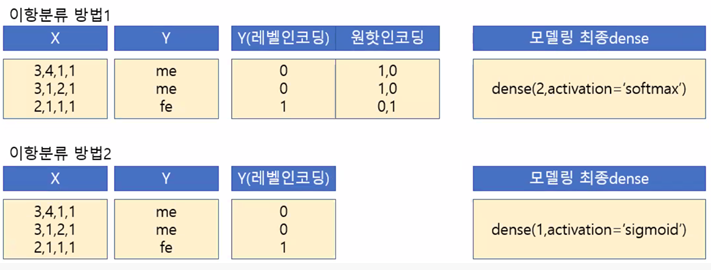

In [3]:
df=pd.read_csv('./dataset/iris.csv', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 데이터 살펴보기

In [5]:
#주의! iris 데이터는 꽃의 종류별로 0~50, 51~100, 101~150개가 정렬되어 있음.
print(df[4].value_counts())
print(df.head(10))
print(df.iloc[50:60])
print(df.tail(10))

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: 4, dtype: int64
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
5  5.4  3.9  1.7  0.4  Iris-setosa
6  4.6  3.4  1.4  0.3  Iris-setosa
7  5.0  3.4  1.5  0.2  Iris-setosa
8  4.4  2.9  1.4  0.2  Iris-setosa
9  4.9  3.1  1.5  0.1  Iris-setosa
      0    1    2    3                4
50  7.0  3.2  4.7  1.4  Iris-versicolor
51  6.4  3.2  4.5  1.5  Iris-versicolor
52  6.9  3.1  4.9  1.5  Iris-versicolor
53  5.5  2.3  4.0  1.3  Iris-versicolor
54  6.5  2.8  4.6  1.5  Iris-versicolor
55  5.7  2.8  4.5  1.3  Iris-versicolor
56  6.3  3.3  4.7  1.6  Iris-versicolor
57  4.9  2.4  3.3  1.0  Iris-versicolor
58  6.6  2.9  4.6  1.3  Iris-versicolor
59  5.2  2.7  3.9  1.4  Iris-versicolor
       0    1    2    3               4
140  6.7  3.1  5.6  2.4  Iris-virginica
141  6.

In [6]:
dataset=df.values
X=dataset[:, 0:4]
y_obj=dataset[:, 4]
X.dtype, y_obj.dtype  #(dtype('O'), dtype('O'))

(dtype('O'), dtype('O'))

In [7]:
#형변환 & #문자열 인코딩
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_obj)
y_le=le.transform(y_obj)
X=X.astype('float')
y_le=y_le.astype('float')

In [9]:
y_le  #y_le는 0 , 1 ,2 로 라벨인코딩된 값들

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [8]:
X.dtype, y_le.dtype 

(dtype('float64'), dtype('float64'))

In [10]:
#from tensorflow.keras.utils import np_utils 하니 생기는 오류 해결하기 위해 아래를 확인.
import tensorflow.keras.utils
dir(tensorflow.keras.utils)

['CustomObjectScope',
 'GeneratorEnqueuer',
 'OrderedEnqueuer',
 'Progbar',
 'Sequence',
 'SequenceEnqueuer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'custom_object_scope',
 'deserialize_keras_object',
 'experimental',
 'get_custom_objects',
 'get_file',
 'get_registered_name',
 'get_registered_object',
 'get_source_inputs',
 'model_to_dot',
 'normalize',
 'pack_x_y_sample_weight',
 'plot_model',
 'register_keras_serializable',
 'serialize_keras_object',
 'to_categorical',
 'unpack_x_y_sample_weight']

In [11]:
from tensorflow.keras.utils import to_categorical #이걸 적용해줌.
y_encoded=tf.keras.utils.to_categorical(y_le)
y_encoded #y_le를 원핫인코딩한 결과. 0 은 [ 1., 0., 0.] 1은 [0., 1 ., 0.] 2는 [0., 0., 1.]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [12]:
y_encoded.shape

(150, 3)

In [ ]:
#k-fold 안하고 훈련셋 테스트셋 골고루 섞이게 하고 싶을 때. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, 
                                                    shuffle=True,  #체계적추출
                                                    stratify=y_encoded,  #층화추출
                                                    random_state=100)

# 모델의 실행
- 데이터 수 너무 적으니==> k-fold 적용
- y값이 순차적으로 있으니 그게 골고루 train test에 들어가도록 할 것.
- 추가 설정: 
-- 학습 자동 중단 ==> model.fit에 callbacks=[early_stopping_callback. 
-- 모델 업데이트 및 저장==> checkpointer
 ---  = ModelCheckpoint(filepath= , monitor='val_loss', verbose=1, save_best_olny=True)


In [22]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# k-fold 없이 예측해보기

In [15]:
normal_model=Sequential()
normal_model.add(Dense(16, input_dim=4, activation='relu'))
normal_model.add(Dense(3, activation='softmax')) #3= y_encoded nunique. 
normal_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
normal_model.fit(X,y_encoded, epochs=50, batch_size=1)

print('\n 정확도: %.4f'%normal_model.evaluate(X, y_encoded)[1])

Epoch 1/50
150/150 [==============================] - 1s 1ms/step - loss: 1.3232 - accuracy: 0.3816
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 0.8098 - accuracy: 0.8121
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.9117
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.8277
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.8389
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8863
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.9494
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.9284
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.9036
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9487

# k-fold 로 해보기..


In [20]:
from sklearn.model_selection import train_test_split

In [26]:
# for 로 실행해보는 k-fold
accuracy=[]
n_fold=10
for i in range(10):

    X_train, X_test, Y_train, Y_test = train_test_split(X, y_encoded, test_size=0.2) 
    
    model = Sequential()
    model.add(Dense(24, input_dim=4, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    
    model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=5, verbose=1)
    
    k_accuracy = '%.4f'%(model.evaluate(X_test, Y_test)[1])
    accuracy.append(k_accuracy)
            
print('\n %.f fold accuracy: '%n_fold, accuracy)
# 10 fold accuracy:  ['1.0000', '1.0000', '1.0000', '0.9667', '1.0000', '0.9667', '1.0000', '1.0000', '0.9667', '0.9667'] <===split할때 shuffle=True, stratify=y_encoded 넣었을때값...

Epoch 1/100
24/24 [==============================] - 1s 15ms/step - loss: 1.1200 - accuracy: 0.4047 - val_loss: 1.1328 - val_accuracy: 0.2667
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0693 - accuracy: 0.3258 - val_loss: 1.0886 - val_accuracy: 0.2667
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9958 - accuracy: 0.3685 - val_loss: 1.0592 - val_accuracy: 0.2667
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9723 - accuracy: 0.3652 - val_loss: 1.0276 - val_accuracy: 0.4000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9537 - accuracy: 0.3896 - val_loss: 1.0083 - val_accuracy: 0.2333
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9186 - accuracy: 0.3732 - val_loss: 0.9799 - val_accuracy: 0.4000
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8931 - accuracy: 0.4179 - val_loss: 0.9577 - val_accuracy: 0.4333
Epoch 8/100


In [ ]:
Y=dataset[:, 4]
Y

In [27]:
#데이터셋이 너무 적으니 k-fold
from sklearn.model_selection import StratifiedKFold, KFold #StratifiedKFold는 k-fold가 label을 데이터와 학습에 올바르게 분배하지 못하는 경우를 해결(데이터가 순서대로 있을때...꽃종류별 50개씩 있잖음지금...)
n_fold=10 #쪼갤 파일 수 
kf=KFold(n_splits=n_fold, shuffle=True, random_state=100) #비율 고려 안하고 무작위로 섞어서 kfold..

accuracy=[]
  
#모델 저장
Model_dir='./model/'
if not os.path.exists(Model_dir):
  os.mkdir(Model_dir)

modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'

#모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

for train, test in kf.split(X,y_encoded): #y_encoded는 라벨인코딩 후 원핫인코딩한 값잉ㅁ.. 
  model=Sequential()
  model.add(Dense(24, input_dim=4, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(3, activation='softmax')) #3= y_encoded nunique. 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X[train],y_encoded[train], validation_data=(X[test], y_encoded[test]), epochs=100, batch_size=5, verbose=1, callbacks=[checkpointer])

  k_accuracy = '%.4f'%(model.evaluate(X[test], y_encoded[test])[1])
  accuracy.append(k_accuracy)


  print('\n %.f fold accuracy: '%n_fold, accuracy)

Epoch 1/100
27/27 [==============================] - 1s 14ms/step - loss: 1.1395 - accuracy: 0.3359 - val_loss: 0.9580 - val_accuracy: 0.5333

Epoch 00001: val_loss improved from inf to 0.95799, saving model to ./model/01-0.9580.hdf5
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 1.0557 - accuracy: 0.3064 - val_loss: 0.9228 - val_accuracy: 0.5333

Epoch 00002: val_loss improved from 0.95799 to 0.92280, saving model to ./model/02-0.9228.hdf5
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 1.0003 - accuracy: 0.4682 - val_loss: 0.8343 - val_accuracy: 0.5333

Epoch 00003: val_loss improved from 0.92280 to 0.83427, saving model to ./model/03-0.8343.hdf5
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.8947 - accuracy: 0.6451 - val_loss: 0.7193 - val_accuracy: 0.5333

Epoch 00004: val_loss improved from 0.83427 to 0.71933, saving model to ./model/04-0.7193.hdf5
Epoch 5/100
27/27 [==============================] - 0s

In [28]:
print('% f fold accuracy: ' %n_fold, accuracy)

 10.000000 fold accuracy:  ['1.0000', '1.0000', '1.0000', '0.8667', '0.9333', '0.8000', '0.9333', '1.0000', '1.0000', '1.0000']


# 미션. 
- StratifiedKFold 검증을 실시할 것(이때 y데이터는 라벨인코딩한 값을 먼저 넣고, for 안에서 원핫인코딩해서 모델링할 것)

In [32]:
#계층화 k-fold...
skf=StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=100)

In [37]:
for train, test in skf.split(X,y_obj): #stratified k-fold에 넣을때 y는 원핫인코딩상태여선 안됨. 그냥 obj 라벨이나 0, 1, 2 라벨인코딩상태까지만 가능. 
                                        #원핫인코딩에서는 ( , 3)의 형태이고, 라벨인코딩한 y_le나 원래 데이터는 ( ,1 )의 shape이기 때문
  print('-------train----------'*10)
  print(train)
  print('--------------------X train----------------------')
  print(X[train], len(X[train]), np.shape(X[train])) #위의 숫자 인덱스에 해당하는 x[train] 데이터 보기 .
  print('-------------------X test-----------------------')
  print(X[test], len(X[test]), np.shape(X[test]))
  print('--------------------y train----------------------')
  print(y_obj[train], len(y_obj[train]), np.shape(y_obj[train])) 
  print('-------------------y test-----------------------')
  print(y_obj[test], len(y_obj[test]), np.shape(y_obj[test]))

-------train-----------------train-----------------train-----------------train-----------------train-----------------train-----------------train-----------------train-----------------train-----------------train----------
[  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  28  29  30  31  32  33  34  35  36  37  38
  39  41  42  43  44  45  46  48  49  50  52  53  54  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  74  75  76  77  78  79
  80  81  82  83  85  86  87  88  89  90  91  93  94  95  96  97  98  99
 100 101 102 103 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 123 124 125 126 127 128 129 131 132 133 134 135 136 137 138
 139 140 142 143 145 146 147 148 149]
--------------------X train----------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1

In [46]:
accuracy=[]
  
#모델 저장
Model_dir='./model/'
if not os.path.exists(Model_dir):
  os.mkdir(Model_dir)

modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'


for train, test in skf.split(X,y_le): #y_le는 라벨인코딩한 값임.. 따라서 이후 for 문 안에서 원핫인코딩을 해주어야 함. 
  
  model=Sequential()
  model.add(Dense(24, input_dim=4, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(3, activation='softmax')) #3= y_encoded nunique. 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
  #모델 업데이트 및 저장
  checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
  
  #학습 자동 중단 설정
  early_stopping_callback=EarlyStopping(monitor='val_loss', patience=100)

  y_le_en=tf.keras.utils.to_categorical(y_le) #라벨인코딩한것을 원핫인코딩으로 바꾸는 부분. 
  model.fit(X[train],y_le_en[train], validation_data=(X[test], y_le_en[test]), epochs=100, batch_size=5, verbose=1, callbacks=[early_stopping_callback, checkpointer])

  k_accuracy = '%.4f'%(model.evaluate(X[test], y_le_en[test])[1])
  accuracy.append(k_accuracy)


print('\n %.f fold accuracy: '%n_fold, accuracy)

Epoch 1/100
27/27 [==============================] - 1s 15ms/step - loss: 1.5473 - accuracy: 0.3831 - val_loss: 1.2181 - val_accuracy: 0.3333

Epoch 00001: val_loss improved from inf to 1.21811, saving model to ./model/01-1.2181.hdf5
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 1.1484 - accuracy: 0.3473 - val_loss: 1.0593 - val_accuracy: 0.3333

Epoch 00002: val_loss improved from 1.21811 to 1.05933, saving model to ./model/02-1.0593.hdf5
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 1.0403 - accuracy: 0.3011 - val_loss: 0.9884 - val_accuracy: 0.2667

Epoch 00003: val_loss improved from 1.05933 to 0.98842, saving model to ./model/03-0.9884.hdf5
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.9903 - accuracy: 0.3838 - val_loss: 0.9405 - val_accuracy: 0.6667

Epoch 00004: val_loss improved from 0.98842 to 0.94046, saving model to ./model/04-0.9405.hdf5
Epoch 5/100
27/27 [==============================] - 0s

In [47]:
cd /content/drive/MyDrive/인공지능실습/모두의 딥러닝/model/

/content/drive/MyDrive/인공지능실습/모두의 딥러닝/model


In [48]:
!ls #생성된 모델들 확인하기.

01-0.9244.hdf5	 12-0.4023.hdf5  23-0.3015.hdf5  37-0.1160.hdf5  59-0.0490.hdf5
01-1.0135.hdf5	 12-0.4080.hdf5  23-0.9794.hdf5  37-0.1335.hdf5  59-0.0900.hdf5
01-1.0789.hdf5	 12-0.4318.hdf5  24-0.1642.hdf5  37-0.1432.hdf5  60-0.0267.hdf5
01-1.1689.hdf5	 12-0.5246.hdf5  24-0.1721.hdf5  37-0.1906.hdf5  60-0.0518.hdf5
01-1.2067.hdf5	 12-0.5900.hdf5  24-0.1898.hdf5  37-0.1986.hdf5  60-0.0707.hdf5
01-1.2164.hdf5	 12-0.6017.hdf5  24-0.2299.hdf5  37-0.5657.hdf5  60-0.0892.hdf5
01-1.4894.hdf5	 12-1.1090.hdf5  24-0.2302.hdf5  38-0.0689.hdf5  60-0.0898.hdf5
01-1.7379.hdf5	 13-0.3426.hdf5  24-0.2805.hdf5  38-0.0795.hdf5  60-0.2488.hdf5
01-2.2410.hdf5	 13-0.3667.hdf5  24-0.2958.hdf5  38-0.1151.hdf5  61-0.0649.hdf5
02-0.8397.hdf5	 13-0.3814.hdf5  24-0.9578.hdf5  38-0.1363.hdf5  61-0.0885.hdf5
02-0.9149.hdf5	 13-0.3827.hdf5  25-0.1525.hdf5  38-0.1669.hdf5  61-0.1205.hdf5
02-0.9406.hdf5	 13-0.4113.hdf5  25-0.1570.hdf5  38-0.1753.hdf5  61-0.1352.hdf5
02-0.9552.hdf5	 13-0.4868.hdf5  25-0.1878.hdf5  38-0